# Case Study-Power Supply and Demand (Ankit - ankit9@powergrid.in, Shradha Dalmia - s.dalmia@powergrid.in & Sahdev Singh - singhsahdev@powergrid.in)

#### Objective: Build a decision tree model for predicting average power consumption for a day, using information from weather data.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import glob

from datetime import datetime
import datetime as dt

from sklearn.metrics import r2_score

In [3]:
# Getting energy consumption data
# Combine all blocks(block_0.csv, block_1.csv, etc…)  into a single pandas data-frame- keeping on relevant columns.

path = 'Energy_Consumption_Data'
energy_consumption_df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
energy_consumption_df.head()

LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4  0.256  

[5 rows x 50 columns]

In [4]:
energy_consumption_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3469352 entries, 0 to 33224
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   LCLid   3469352 non-null  object 
 1   day     3469352 non-null  object 
 2   hh_0    3469352 non-null  float64
 3   hh_1    3469352 non-null  float64
 4   hh_2    3469352 non-null  float64
 5   hh_3    3469352 non-null  float64
 6   hh_4    3469352 non-null  float64
 7   hh_5    3469352 non-null  float64
 8   hh_6    3469352 non-null  float64
 9   hh_7    3469352 non-null  float64
 10  hh_8    3469352 non-null  float64
 11  hh_9    3469352 non-null  float64
 12  hh_10   3469352 non-null  float64
 13  hh_11   3469352 non-null  float64
 14  hh_12   3469352 non-null  float64
 15  hh_13   3469352 non-null  float64
 16  hh_14   3469352 non-null  float64
 17  hh_15   3469352 non-null  float64
 18  hh_16   3469352 non-null  float64
 19  hh_17   3469352 non-null  float64
 20  hh_18   3469352 non-null  

In [5]:
# Check for missing values
energy_consumption_df.isnull().sum()

LCLid       0
day         0
hh_0        0
hh_1        0
hh_2        0
hh_3        0
hh_4        0
hh_5        0
hh_6        0
hh_7        0
hh_8        0
hh_9        0
hh_10       0
hh_11       0
hh_12       0
hh_13       0
hh_14       0
hh_15       0
hh_16       0
hh_17       0
hh_18       0
hh_19       2
hh_20       0
hh_21       0
hh_22       0
hh_23       0
hh_24       0
hh_25      21
hh_26       2
hh_27       0
hh_28       0
hh_29       0
hh_30    5460
hh_31       0
hh_32       0
hh_33       0
hh_34       0
hh_35       0
hh_36       1
hh_37       0
hh_38       0
hh_39       0
hh_40       0
hh_41       0
hh_42       0
hh_43       0
hh_44       0
hh_45       0
hh_46       0
hh_47       0
dtype: int64

In [6]:
energy_consumption_df = energy_consumption_df.dropna()
print(energy_consumption_df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463866 entries, 0 to 33224
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   LCLid   3463866 non-null  object 
 1   day     3463866 non-null  object 
 2   hh_0    3463866 non-null  float64
 3   hh_1    3463866 non-null  float64
 4   hh_2    3463866 non-null  float64
 5   hh_3    3463866 non-null  float64
 6   hh_4    3463866 non-null  float64
 7   hh_5    3463866 non-null  float64
 8   hh_6    3463866 non-null  float64
 9   hh_7    3463866 non-null  float64
 10  hh_8    3463866 non-null  float64
 11  hh_9    3463866 non-null  float64
 12  hh_10   3463866 non-null  float64
 13  hh_11   3463866 non-null  float64
 14  hh_12   3463866 non-null  float64
 15  hh_13   3463866 non-null  float64
 16  hh_14   3463866 non-null  float64
 17  hh_15   3463866 non-null  float64
 18  hh_16   3463866 non-null  float64
 19  hh_17   3463866 non-null  float64
 20  hh_18   3463866 non-null  

In [7]:
energy_consumption_df.describe()

hh_0          hh_1          hh_2          hh_3          hh_4  \
count  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06   
mean   1.792601e-01  1.692287e-01  1.519381e-01  1.380224e-01  1.278840e-01   
std    3.088516e-01  3.289760e-01  2.978925e-01  2.653864e-01  2.371985e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.200000e-02  4.800000e-02  4.600000e-02  4.400000e-02  4.200000e-02   
50%    9.800000e-02  8.800000e-02  8.100000e-02  7.700000e-02  7.400000e-02   
75%    1.910000e-01  1.680000e-01  1.500000e-01  1.380000e-01  1.300000e-01   
max    7.272000e+00  8.717000e+00  8.025000e+00  8.750000e+00  8.414000e+00   

               hh_5          hh_6          hh_7          hh_8          hh_9  \
count  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06   
mean   1.216648e-01  1.170349e-01  1.142320e-01  1.132312e-01  1.157390e-01   
std    2.195469e-01  2.075467e-01  1.967227e-01  1.901919e-01  1.920148e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.200000e-02  4.100000e-02  4.100000e-02  4.000000e-02  4.100000e-02   
50%    7.200000e-02  7.100000e-02  7.000000e-02  7.000000e-02  7.100000e-02   
75%    1.250000e-01  1.210000e-01  1.200000e-01  1.190000e-01  1.220000e-01   
max    8.591000e+00  7.357000e+00  7.676000e+00  7.581000e+00  7.568000e+00   

       ...         hh_38         hh_39         hh_40         hh_41  \
count  ...  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06   
mean   ...  3.208839e-01  3.207028e-01  3.156920e-01  3.098107e-01   
std    ...  3.680363e-01  3.629358e-01  3.520664e-01  3.422556e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  1.010000e-01  1.050000e-01  1.080000e-01  1.090000e-01   
50%    ...  2.010000e-01  2.050000e-01  2.070000e-01  2.070000e-01   
75%    ...  3.900000e-01  3.890000e-01  3.820000e-01  3.750000e-01   
max    ...  8.833000e+00  9.141000e+00  8.998000e+00  9.189000e+00   

              hh_42         hh_43         hh_44         hh_45         hh_46  \
count  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06  3.463866e+06   
mean   2.999731e-01  2.875616e-01  2.662309e-01  2.421202e-01  2.143053e-01   
std    3.300337e-01  3.188837e-01  3.026914e-01  2.848476e-01  2.648266e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.080000e-01  1.030000e-01  9.200000e-02  7.900000e-02  6.700000e-02   
50%    2.030000e-01  1.950000e-01  1.780000e-01  1.580000e-01  1.340000e-01   
75%    3.630000e-01  3.490000e-01  3.230000e-01  2.940000e-01  2.580000e-01   
max    8.539000e+00  9.257000e+00  7.819000e+00  8.051000e+00  7.769000e+00   

              hh_47  
count  3.463866e+06  
mean   1.871312e-01  
std    2.418315e-01  
min    0.000000e+00  
25%    5.800000e-02  
50%    1.130000e-01  
75%    2.210000e-01  
max    8.411000e+00  

[8 rows x 48 columns]

In [8]:
# Find total energy consumed in a day by each household in the energy data-frame
energy_consumption_df['Total Energy Consumed per Day per House'] = energy_consumption_df.loc[:, \
                                                                                             'hh_0':'hh_47'].sum(axis=1)

In [9]:
# Count the number of houses measured for each day from the energy data-frame
energy_consumption_df.groupby('day').size()

day
2011-11-24      13
2011-11-25      25
2011-11-26      32
2011-11-27      41
2011-11-28      41
              ... 
2014-02-23    4963
2014-02-24    4979
2014-02-25    4964
2014-02-26    4943
2014-02-27    4978
Length: 827, dtype: int64

In [10]:
energy_consumption_df.head()

LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  hh_47  \
0  0.119  ...  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259  0.250   
1  0.083  ...  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278  0.159   
2  0.074  ...  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241  0.237   
3  0.109  ...  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157  0.202   
4  0.118  ...  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288  0.256   

   Total Energy Consumed per Day per House  
0                                   11.087  
1                                   13.223  
2                                   10.257  
3                                    9.769  
4                                   10.885  

[5 rows x 51 columns]

In [11]:
# Getting energy consumption dataframe with relevant columns only
temp_df = energy_consumption_df[['day', 'Total Energy Consumed per Day per House']]

# Find average energy consumed in a day using relevant houses for each date. 
# Note that readings for a day can have a varying number of households.
avg_energy_consumption_df = temp_df.groupby('day').mean()
avg_energy_consumption_df.rename(columns = {'Total Energy Consumed per Day per House':'Avg_Energy_Consumed_per_Day'},\
                                 inplace = True)
avg_energy_consumption_df.head()

Avg_Energy_Consumed_per_Day
day                                    
2011-11-24                    10.728615
2011-11-25                    10.182200
2011-11-26                    10.610687
2011-11-27                    10.850805
2011-11-28                    10.105561

In [12]:
# Open weather information in weather_daily.csv to another pandas data frame.

weather_df = pd.read_csv('weather_daily.csv')

In [13]:
weather_df.head()

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

In [14]:
weather_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [15]:
# Check for missing values
weather_df.isnull().sum()

temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentTemperatureMaxTime     0
apparentTe

In [16]:
weather_df = weather_df.dropna()
print(weather_df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               881 non-null    float64
 1   temperatureMaxTime           881 non-null    object 
 2   windBearing                  881 non-null    int64  
 3   icon                         881 non-null    object 
 4   dewPoint                     881 non-null    float64
 5   temperatureMinTime           881 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    881 non-null    float64
 8   pressure                     881 non-null    float64
 9   apparentTemperatureMinTime   881 non-null    object 
 10  apparentTemperatureHigh      881 non-null    float64
 11  precipType                   881 non-null    object 
 12  visibility                   881 non-null    float64
 13  humidity            

In [17]:
# In weather_daily.csv, the date is given as time-stamp (e.g. 2011-12-24 23:00:00).
# Convert it into yyyy-mm-dd format (e.g. 2011-12-24). This is required to match the dates with the energy data frame.

# Getting one column for date and convert it in yyyy-mm-dd format
temp = pd.to_datetime(weather_df['sunriseTime']).dt.date


# Remove columns involving non-numeric information from weather_daily.csv. 
# Use only numeric values from the weather data for training decision trees. (Avoid using dates, words etc.)

weather_df_numeric = weather_df._get_numeric_data()
weather_df_numeric.head()

temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  \
0           11.96          123      9.40        0.79       3.88   1016.08   
1            8.59          198      4.49        0.56       3.94   1007.71   
2           10.33          225      5.47        0.85       3.54   1032.76   
3            8.07          232      3.69        0.32       3.00   1012.12   
4            8.22          252      2.79        0.37       4.46   1028.17   

   apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  \
0                    10.87        3.30      0.95                   10.87   
1                     5.62       12.09      0.88                   -0.64   
2                    10.33       13.39      0.74                    5.52   
3                     5.33       11.89      0.87                    3.26   
4                     5.02       13.16      0.80                    4.37   

   apparentTemperatureMax  uvIndex  temperatureLow  temperatureMin  \
0                   11.96      1.0           10.87            8.85   
1                    5.72      1.0            3.09            2.48   
2                   10.33      0.0            8.03            8.03   
3                    5.33      1.0            6.33            2.56   
4                    5.32      1.0            7.45            3.17   

   temperatureHigh  apparentTemperatureMin  moonPhase  
0            10.87                    6.48       0.52  
1             8.59                    0.11       0.53  
2            10.33                    5.59       0.10  
3             7.36                    0.46       0.25  
4             7.93                   -0.51       0.99

In [18]:
weather_df_numeric.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperatureMax           881 non-null    float64
 1   windBearing              881 non-null    int64  
 2   dewPoint                 881 non-null    float64
 3   cloudCover               881 non-null    float64
 4   windSpeed                881 non-null    float64
 5   pressure                 881 non-null    float64
 6   apparentTemperatureHigh  881 non-null    float64
 7   visibility               881 non-null    float64
 8   humidity                 881 non-null    float64
 9   apparentTemperatureLow   881 non-null    float64
 10  apparentTemperatureMax   881 non-null    float64
 11  uvIndex                  881 non-null    float64
 12  temperatureLow           881 non-null    float64
 13  temperatureMin           881 non-null    float64
 14  temperatureHigh          8

In [19]:
# add date to numeric weather df
weather_df_numeric['date'] = temp

# set index to date in weather_df_numeric
weather_df_numeric.set_index('date', inplace=True)

In [20]:
# Convert dtype of index to datetime before merging
avg_energy_consumption_df.index = pd.to_datetime(avg_energy_consumption_df.index)
weather_df_numeric.index = pd.to_datetime(weather_df_numeric.index)

In [21]:
# combining weather dataframe with energy dataframe
avg_energy_weather_df = pd.concat([avg_energy_consumption_df, weather_df_numeric], axis=1, join="inner")

In [22]:
#avg_energy_consumed_day.index
avg_energy_weather_df.head()

Avg_Energy_Consumed_per_Day  temperatureMax  windBearing  \
2011-11-24                    10.728615           12.93          204   
2011-11-25                    10.182200           13.03          243   
2011-11-26                    10.610687           12.96          237   
2011-11-27                    10.850805           13.54          256   
2011-11-28                    10.105561           12.58          190   

            dewPoint  cloudCover  windSpeed  pressure  \
2011-11-24      8.56        0.41       4.04   1027.22   
2011-11-25      7.24        0.48       5.02   1024.47   
2011-11-26      6.96        0.44       5.75   1025.80   
2011-11-27      5.76        0.42       5.48   1021.11   
2011-11-28      4.39        0.56       2.34   1022.80   

            apparentTemperatureHigh  visibility  humidity  \
2011-11-24                    12.93       10.64      0.89   
2011-11-25                    12.27       12.38      0.79   
2011-11-26                    12.96       13.07      0.81   
2011-11-27                    13.54       13.08      0.72   
2011-11-28                    10.27       11.84      0.86   

            apparentTemperatureLow  apparentTemperatureMax  uvIndex  \
2011-11-24                    7.30                   12.93      1.0   
2011-11-25                    4.69                   13.03      1.0   
2011-11-26                   11.59                   12.96      1.0   
2011-11-27                    1.31                   13.54      1.0   
2011-11-28                   10.27                   12.58      1.0   

            temperatureLow  temperatureMin  temperatureHigh  \
2011-11-24            9.71            8.56            12.93   
2011-11-25            7.01            7.46            12.27   
2011-11-26           11.59            7.01            12.96   
2011-11-27            1.31            4.47            13.54   
2011-11-28           10.27            1.31            10.27   

            apparentTemperatureMin  moonPhase  
2011-11-24                    7.01       0.97  
2011-11-25                    4.84       0.01  
2011-11-26                    4.69       0.05  
2011-11-27                    2.94       0.08  
2011-11-28                    1.31       0.12

In [23]:
# Check for missing values
avg_energy_weather_df.isnull().sum()

Avg_Energy_Consumed_per_Day    0
temperatureMax                 0
windBearing                    0
dewPoint                       0
cloudCover                     0
windSpeed                      0
pressure                       0
apparentTemperatureHigh        0
visibility                     0
humidity                       0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
apparentTemperatureMin         0
moonPhase                      0
dtype: int64

In [24]:
avg_energy_weather_df.describe()

Avg_Energy_Consumed_per_Day  temperatureMax  windBearing    dewPoint  \
count                   826.000000      826.000000   826.000000  826.000000   
mean                     10.412517       13.695061   198.087167    6.548935   
std                       1.851906        6.338097    89.089698    4.924662   
min                       7.636806       -0.060000     0.000000   -7.840000   
25%                       8.591514        9.322500   130.250000    3.095000   
50%                      10.418464       12.580000   221.000000    6.440000   
75%                      11.864036       18.112500   256.000000   10.227500   
max                      15.946065       32.400000   359.000000   17.770000   

       cloudCover   windSpeed     pressure  apparentTemperatureHigh  \
count  826.000000  826.000000   826.000000                826.00000   
mean     0.479552    3.605472  1014.062482                 12.71523   
std      0.191643    1.709272    11.102876                  7.46739   
min      0.000000    0.200000   979.250000                 -6.46000   
25%      0.350000    2.372500  1007.422500                  6.62250   
50%      0.470000    3.480000  1014.445000                 12.44000   
75%      0.600000    4.600000  1021.597500                 18.11000   
max      1.000000    9.960000  1040.920000                 32.42000   

       visibility    humidity  apparentTemperatureLow  apparentTemperatureMax  \
count  826.000000  826.000000              826.000000              826.000000   
mean    11.302918    0.780157                6.143765               12.928499   
std      2.321110    0.094659                6.162358                7.289099   
min      1.480000    0.430000               -8.880000               -4.110000   
25%     10.562500    0.720000                1.437500                7.172500   
50%     12.045000    0.790000                5.380000               12.580000   
75%     12.860000    0.850000               11.657500               18.127500   
max     15.340000    0.980000               20.540000               32.420000   

          uvIndex  temperatureLow  temperatureMin  temperatureHigh  \
count  826.000000      826.000000      826.000000       826.000000   
mean     2.595642        7.769867        7.463535        13.573123   
std      1.867406        4.968234        4.989811         6.417881   
min      0.000000       -5.640000       -5.640000        -0.810000   
25%      1.000000        3.980000        3.645000         9.102500   
50%      2.000000        7.540000        7.095000        12.440000   
75%      4.000000       11.657500       11.467500        18.087500   
max      7.000000       20.540000       20.540000        32.400000   

       apparentTemperatureMin   moonPhase  
count              826.000000  826.000000  
mean                 5.780206    0.500291  
std                  6.180562    0.287665  
min                 -8.880000    0.000000  
25%                  1.072500    0.250000  
50%                  4.940000    0.500000  
75%                 11.467500    0.750000  
max                 20.540000    0.990000

### Using Decision Trees

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
# No hyperparameter tuning
DT1 = DecisionTreeRegressor(random_state=42)

### Splitting the Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(avg_energy_weather_df, test_size = 0.3, random_state = 100)

In [28]:
print("Train shape - ", df_train.shape)
print("Test shape - ", df_test.shape)

Train shape -  (578, 18)
Test shape -  (248, 18)


In [29]:
df_train.head()

Avg_Energy_Consumed_per_Day  temperatureMax  windBearing  \
2013-03-29                    12.237733            5.31           55   
2013-04-12                    10.375120           11.51          227   
2011-12-25                    13.016673           11.98          237   
2012-11-09                    10.953551           11.27          195   
2013-04-06                    11.095713            9.87           35   

            dewPoint  cloudCover  windSpeed  pressure  \
2013-03-29     -4.23        0.59       3.52   1010.88   
2013-04-12      6.92        0.54       3.04    997.53   
2011-12-25      7.90        0.88       5.81   1028.45   
2012-11-09      6.21        0.70       3.17   1010.05   
2013-04-06     -2.24        0.23       2.75   1023.34   

            apparentTemperatureHigh  visibility  humidity  \
2013-03-29                     1.71       13.45      0.63   
2013-04-12                    11.51       11.62      0.87   
2011-12-25                    11.54       13.99      0.83   
2012-11-09                    11.27       13.37      0.80   
2013-04-06                     8.53       13.02      0.63   

            apparentTemperatureLow  apparentTemperatureMax  uvIndex  \
2013-03-29                   -2.65                    1.71      3.0   
2013-04-12                    3.30                   11.51      3.0   
2011-12-25                   11.52                   11.98      0.0   
2012-11-09                    7.16                   11.27      1.0   
2013-04-06                   -1.21                    8.53      3.0   

            temperatureLow  temperatureMin  temperatureHigh  \
2013-03-29            0.94           -0.52             5.31   
2013-04-12            4.92            7.09            11.51   
2011-12-25           11.52            8.67            11.54   
2012-11-09            8.80            8.13            11.27   
2013-04-06           -1.21            0.64             9.87   

            apparentTemperatureMin  moonPhase  
2013-03-29                   -2.99       0.57  
2013-04-12                    4.87       0.07  
2011-12-25                    5.93       0.03  
2012-11-09                    6.70       0.84  
2013-04-06                   -2.67       0.87

### Rescaling the Features 

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
df_train['Avg_Energy_Consumed_per_Day'] = scaler.fit_transform(df_train[['Avg_Energy_Consumed_per_Day']])
df_test['Avg_Energy_Consumed_per_Day'] = scaler.transform(df_test[['Avg_Energy_Consumed_per_Day']])

In [32]:
df_train.Avg_Energy_Consumed_per_Day.describe()

count    578.000000
mean       0.341083
std        0.221940
min        0.000000
25%        0.121841
50%        0.355932
75%        0.516559
max        1.000000
Name: Avg_Energy_Consumed_per_Day, dtype: float64

In [33]:
y_train = df_train.pop("Avg_Energy_Consumed_per_Day")
X_train = df_train

y_test = df_test.pop("Avg_Energy_Consumed_per_Day")
X_test = df_test

In [34]:
X_test.shape, X_train.shape

((248, 17), (578, 17))

#### Fit the DT1 model without hyperparameter tuning

In [35]:
DT1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
!pip install six

In [37]:
# Visualizing decision tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(DT1, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.817805 to fit

(process:3008): GLib-GIO-WARNING **: 13:57:39.551: Unexpectedly, UWP app `WuhanNetPowerTechnologyCo.263127120D341_1.9.0.0_x86__63m8b6nby1dvp' (AUMId `WuhanNetPowerTechnologyCo.263127120D341_63m8b6nby1dvp!App') supports 4 extensions but has no verbs

(process:3008): GLib-GIO-WARNING **: 13:57:39.682: Unexpectedly, UWP app `48914EllipticPhenomena.OnePhotoViewer_1.17.2.0_neutral__8w313s78tpvfc' (AUMId `48914EllipticPhenomena.OnePhotoViewer_8w313s78tpvfc!App') supports 34 extensions but has no verbs

(process:3008): GLib-GIO-WARNING **: 13:57:40.159: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.2.8.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs



In [38]:
y_train_pred = DT1.predict(X_train)

In [39]:
print("r2_score for train data", round(r2_score(y_train, y_train_pred), 4))

r2_score for train data 1.0


In [40]:
from sklearn.metrics import mean_squared_error

print("Mean Square Error for train data", round(mean_squared_error(y_train, y_train_pred), 4))

Mean Square Error for train data 0.0


In [41]:
y_test_pred = DT1.predict(X_test)

In [42]:
print("r2_score for test data", round(r2_score(y_test, y_test_pred), 4))

r2_score for test data 0.776


In [43]:
print("Mean Square Error for test data", round(mean_squared_error(y_test, y_test_pred), 4))

Mean Square Error for test data 0.0116


In [44]:
DT1.feature_importances_

array([0.81199052, 0.00550881, 0.00327665, 0.01102576, 0.01087484,
       0.03333117, 0.01051417, 0.00544219, 0.0105163 , 0.00774963,
       0.0148411 , 0.04024634, 0.00462972, 0.00690982, 0.00834925,
       0.00959918, 0.00519456])

In [45]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": DT1.feature_importances_})

In [46]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0            temperatureMax  0.811991
11                  uvIndex  0.040246
5                  pressure  0.033331
10   apparentTemperatureMax  0.014841
3                cloudCover  0.011026
4                 windSpeed  0.010875
8                  humidity  0.010516
6   apparentTemperatureHigh  0.010514
15   apparentTemperatureMin  0.009599
14          temperatureHigh  0.008349
9    apparentTemperatureLow  0.007750
13           temperatureMin  0.006910
1               windBearing  0.005509
7                visibility  0.005442
16                moonPhase  0.005195
12           temperatureLow  0.004630
2                  dewPoint  0.003277

### Hyper-parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Create the parameter grid based on the results of random search 
params = {
    'splitter':["best","random"],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'max_features':["auto","log2","sqrt",None],
    'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
}

In [49]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')

In [50]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18000 candidates, totalling 54000 fits
Wall time: 1min 29s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [51]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [52]:
grid_search.best_score_

-0.009172793877136765

### Training Decision Tree With Best Hyperparameters

In [53]:
DT2 = DecisionTreeRegressor(max_depth = 5, max_features = 'auto',\
                                         max_leaf_nodes = None, min_samples_leaf = 5, \
                                         min_weight_fraction_leaf = 0.1, splitter = 'best')

In [54]:
DT2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=5,
                      min_weight_fraction_leaf=0.1)

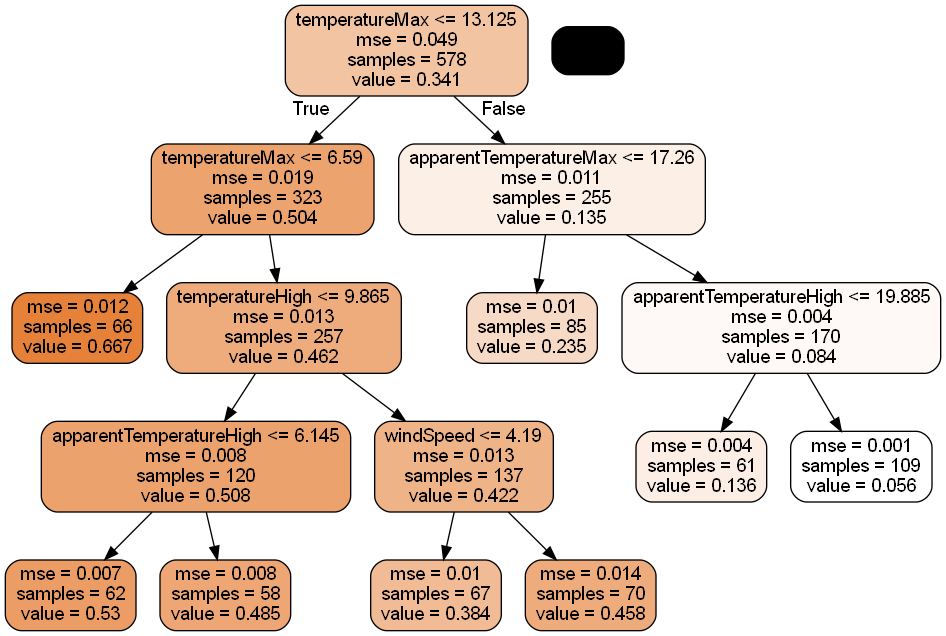

In [55]:
# Visualizing decision tree
dot_data = StringIO()

export_graphviz(DT2, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [56]:
y_train_pred = DT2.predict(X_train)

In [57]:
print("r2_score for train data with hyperparameter tuning :", round(r2_score(y_train, y_train_pred), 4))

r2_score for train data with hyperparameter tuning : 0.8408


In [58]:
print("Mean Square Error for train data with hyperparameter tuning :", \
      round(mean_squared_error(y_train, y_train_pred), 4))

Mean Square Error for train data with hyperparameter tuning : 0.0078


In [59]:
y_test_pred = DT2.predict(X_test)

In [60]:
print("r2_score for test data with hyperparameter tuning :", round(r2_score(y_test, y_test_pred), 4))

r2_score for test data with hyperparameter tuning : 0.7993


In [61]:
print("Mean Square Error for test data with hyperparameter tuning :", \
      round(mean_squared_error(y_test, y_test_pred), 4))

Mean Square Error for test data with hyperparameter tuning : 0.0104


### Analysis

#### Without hyperparameter tuning ----
##### * MSE for train data : 0.0 and r2_score = 1 which means the model is overfitting the data
##### * MSE for test data : 0.0116 and r2_score = 0.776 

##### There is a severe drop in r2_score from training data to test data depicting poor performance of model.

##### Also, looking at Variable Importance, we see that the power consumption is largely dependent only on Maximum Temperature as the feature importance for temperaturemax is 0.81 which is far greater than others. 

#### With hyperparameter tuning ----

##### * MSE for train data : 0.0078 
##### * MSE for test data : 0.0104

##### Comparing MSE values on test data, we see that DT2 i.e. Decision Tree with Hyperparameter tuning has low error than DT1 i.e. Decision tree without Hyperparameter tuning. 
 



In [62]:
DT2.feature_importances_

array([0.90503913, 0.        , 0.        , 0.        , 0.00792702,
       0.        , 0.01308853, 0.        , 0.        , 0.        ,
       0.05410914, 0.        , 0.        , 0.        , 0.01983618,
       0.        , 0.        ])

In [63]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": DT2.feature_importances_})

In [64]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0            temperatureMax  0.905039
10   apparentTemperatureMax  0.054109
14          temperatureHigh  0.019836
6   apparentTemperatureHigh  0.013089
4                 windSpeed  0.007927
15   apparentTemperatureMin  0.000000
13           temperatureMin  0.000000
12           temperatureLow  0.000000
11                  uvIndex  0.000000
8                  humidity  0.000000
9    apparentTemperatureLow  0.000000
1               windBearing  0.000000
7                visibility  0.000000
5                  pressure  0.000000
3                cloudCover  0.000000
2                  dewPoint  0.000000
16                moonPhase  0.000000

### It can be seen from diagram and above results that most important weather factors (in decreasing order of importance) that affect energy consumption are -
####  1. temperatureMax
#### 2. apparentTemperatureMax
#### 3. temperatureHigh
#### 4. apparentTemperatureHigh
#### 5. windSpeed

### Task 2 [Optional: Not for evaluation]

In [65]:
# Add month column to dataframe
avg_energy_weather_df['month'] = avg_energy_weather_df.index.month

# Get January month data
winter_df = avg_energy_weather_df[avg_energy_weather_df['month']==1]
# Remove month column from winter dataframe for regression
winter_df.drop(['month'], axis=1)

Avg_Energy_Consumed_per_Day  temperatureMax  windBearing  \
2012-01-01                    12.466265           12.59          227   
2012-01-02                    12.755293            7.57          237   
2012-01-03                    12.858887           12.41          234   
2012-01-04                    12.775281            9.33          253   
2012-01-05                    12.804500           11.46          283   
...                                 ...             ...          ...   
2014-01-27                    11.764990            7.95          234   
2014-01-28                    11.357629            9.12          180   
2014-01-29                    11.806038            5.46           97   
2014-01-30                    11.697145            5.94           65   
2014-01-31                    11.871223            8.83          177   

            dewPoint  cloudCover  windSpeed  pressure  \
2012-01-01      9.45        0.58       4.92   1004.82   
2012-01-02      2.80        0.21       4.81   1008.49   
2012-01-03      5.73        0.48       8.47   1003.23   
2012-01-04      3.38        0.49       7.98   1014.07   
2012-01-05      4.28        0.47       9.49   1004.74   
...              ...         ...        ...       ...   
2014-01-27      1.44        0.38       5.29    989.87   
2014-01-28      3.59        0.61       4.32    985.33   
2014-01-29      3.05        0.93       4.25    993.99   
2014-01-30      3.08        0.81       1.52   1001.76   
2014-01-31      3.93        0.73       4.74    998.51   

            apparentTemperatureHigh  visibility  humidity  \
2012-01-01                    12.56       12.33      0.90   
2012-01-02                     4.04       13.23      0.81   
2012-01-03                    12.41       10.80      0.82   
2012-01-04                     4.36       12.62      0.78   
2012-01-05                    11.04       12.92      0.70   
...                             ...         ...       ...   
2014-01-27                     4.34       12.68      0.79   
2014-01-28                     6.34       11.94      0.83   
2014-01-29                     1.36        9.53      0.90   
2014-01-30                     5.86        6.63      0.91   
2014-01-31                     3.13        7.08      0.91   

            apparentTemperatureLow  apparentTemperatureMax  uvIndex  \
2012-01-01                    1.65                   12.59      1.0   
2012-01-02                    1.27                    4.80      1.0   
2012-01-03                    0.79                   12.41      1.0   
2012-01-04                    3.84                    4.77      1.0   
2012-01-05                    1.64                   11.46      1.0   
...                            ...                     ...      ...   
2014-01-27                    1.43                    4.34      1.0   
2014-01-28                    1.21                    6.34      1.0   
2014-01-29                    0.36                    2.53      1.0   
2014-01-30                    0.29                    5.86      1.0   
2014-01-31                    1.10                    5.27      1.0   

            temperatureLow  temperatureMin  temperatureHigh  \
2012-01-01            5.18            7.71            12.56   
2012-01-02            4.69            4.69             7.57   
2012-01-03            5.27            5.96            12.41   
2012-01-04            8.16            5.27             8.21   
2012-01-05            4.40            7.34            11.04   
...                    ...             ...              ...   
2014-01-27            4.81            2.56             7.95   
2014-01-28            4.76            5.03             9.12   
2014-01-29            3.66            3.72             4.79   
2014-01-30            1.97            3.00             5.94   
2014-01-31            4.83            1.97             7.08   

            apparentTemperatureMin  moonPhase  
2012-01-01                    4.86       0.26  
2012-01-02             

In [66]:
# Splitting the data
np.random.seed(0)
df_train, df_test = train_test_split(winter_df, test_size = 0.3, random_state = 100)

In [67]:
# Rescaling the features
scaler = MinMaxScaler()

In [68]:
df_train['Avg_Energy_Consumed_per_Day'] = scaler.fit_transform(df_train[['Avg_Energy_Consumed_per_Day']])
df_test['Avg_Energy_Consumed_per_Day'] = scaler.transform(df_test[['Avg_Energy_Consumed_per_Day']])

In [69]:
y_train = df_train.pop("Avg_Energy_Consumed_per_Day")
X_train = df_train

y_test = df_test.pop("Avg_Energy_Consumed_per_Day")
X_test = df_test

In [70]:
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')

In [71]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18000 candidates, totalling 54000 fits
Wall time: 1min 23s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [73]:
grid_search.best_score_

-0.03515690789649586

In [74]:
DT_Winter = DecisionTreeRegressor(max_depth = 2, max_features = 'log2',\
                                         max_leaf_nodes = None, min_samples_leaf = 10, \
                                         min_weight_fraction_leaf = 0.1, splitter = 'best')

In [75]:
DT_Winter.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='log2', min_samples_leaf=10,
                      min_weight_fraction_leaf=0.1)

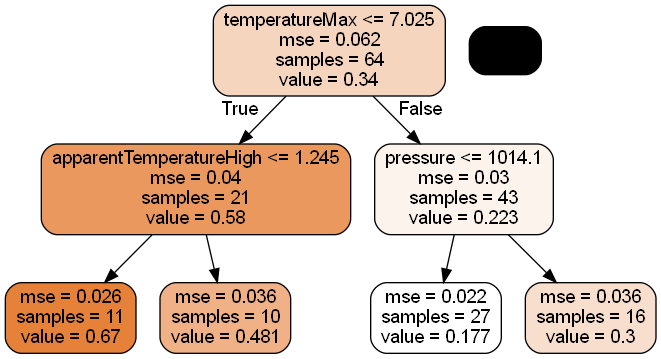

In [76]:
# Visualizing decision tree
dot_data = StringIO()

export_graphviz(DT_Winter, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [77]:
y_train_pred = DT_Winter.predict(X_train)
y_test_pred = DT_Winter.predict(X_test)

print("Mean Square Error for train data (Winter) :", \
      round(mean_squared_error(y_train, y_train_pred), 4))
print("Mean Square Error for test data (Winter) :", \
      round(mean_squared_error(y_test, y_test_pred), 4))

Mean Square Error for train data (Winter) : 0.0282
Mean Square Error for test data (Winter) : 0.0344


In [78]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": DT_Winter.feature_importances_})
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0            temperatureMax  0.840335
6   apparentTemperatureHigh  0.087953
5                  pressure  0.071712
10   apparentTemperatureMax  0.000000
16                moonPhase  0.000000
15   apparentTemperatureMin  0.000000
14          temperatureHigh  0.000000
13           temperatureMin  0.000000
12           temperatureLow  0.000000
11                  uvIndex  0.000000
9    apparentTemperatureLow  0.000000
1               windBearing  0.000000
8                  humidity  0.000000
7                visibility  0.000000
4                 windSpeed  0.000000
3                cloudCover  0.000000
2                  dewPoint  0.000000
17                    month  0.000000

### It can be seen from diagram and above results that most important weather factors (in decreasing order of importance) for Winter Season (January) that affect energy consumption are -
####  1. temperatureMax
#### 2. apparentTemperatureHigh
#### 3. pressure